<a href="https://colab.research.google.com/github/danielgomescruz/Meus_estudos/blob/main/Aula_9_DDS4_Modelos_de_Classificac%CC%A7a%CC%83o%2C_Regressao_Logistica_dgc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

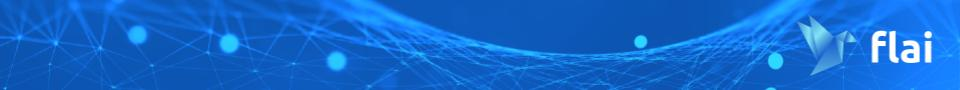

# **Aula 9 - DDS4 - Modelos de Classificação, Regressão Logística**

## **Importação e Preparação dos Dados**

In [2]:
# via github 

import pandas as pd
url = 'https://raw.githubusercontent.com/gitflai/DDS4/main/insurance.csv'
dados = pd.read_csv(url)
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
dados['charges'] = dados['charges'] / 1000 
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


## **Upgrade na Técnica de Validação: _K-FOLD_**

In [4]:
#o problema do holdout repetido e so em conjunto de dados simples
# Configuração da Validação Cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


In [5]:
validacao = KFold(n_splits = 10, shuffle = True) #shuffle embaralha os dados e n_split e o tamanho do k, deixar em True

---
## **Regressão Logística**

In [34]:
from sklearn.linear_model import LogisticRegression 

X = dados[['bmi', 'charges']]
y = dados['smoker'] #as pessoas podem mentir em relacao a isso

modelo = LogisticRegression() #objeto regressao logistica

In [35]:
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

In [36]:
reglog

{'fit_time': array([0.01362395, 0.0079627 , 0.00789356, 0.00769067, 0.00750184,
        0.00845027, 0.00803638, 0.00756359, 0.00763607, 0.00798702]),
 'score_time': array([0.00245094, 0.00214767, 0.00217819, 0.00199842, 0.00206661,
        0.0026288 , 0.00220847, 0.00228381, 0.00227237, 0.0023632 ]),
 'test_accuracy': array([0.92537313, 0.8880597 , 0.93283582, 0.94776119, 0.95522388,
        0.93283582, 0.91791045, 0.94029851, 0.97744361, 0.90977444]),
 'test_precision': array([0.81481481, 0.80769231, 0.88888889, 0.92      , 0.91304348,
        0.76666667, 0.75      , 0.93103448, 0.91666667, 0.88      ]),
 'test_recall': array([0.81481481, 0.67741935, 0.8       , 0.82142857, 0.84      ,
        0.92      , 0.71428571, 0.81818182, 0.95652174, 0.70967742])}

In [37]:
round(reglog['test_accuracy'].mean(), 4) #passeia pelos n_splits e traz a media

0.9328

In [38]:
round(reglog['test_recall'].mean(), 4)

0.8072

In [39]:
round(reglog['test_precision'].mean(), 4)

0.8589

In [40]:
print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4)) #taxa de acerto pelo todo (vp + vn) / (vn + vp + fn + fp)
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4)) # taxa de acerto dos fumantes (1) vp / (vp + fn)
print('     Precisão:', round(reglog['test_precision'].mean(), 4)) #taxa de acerto total (classificacao precisa) vp / (vp + fp)

     Acurácia: 0.9328
Sensibilidade: 0.8072
     Precisão: 0.8589


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


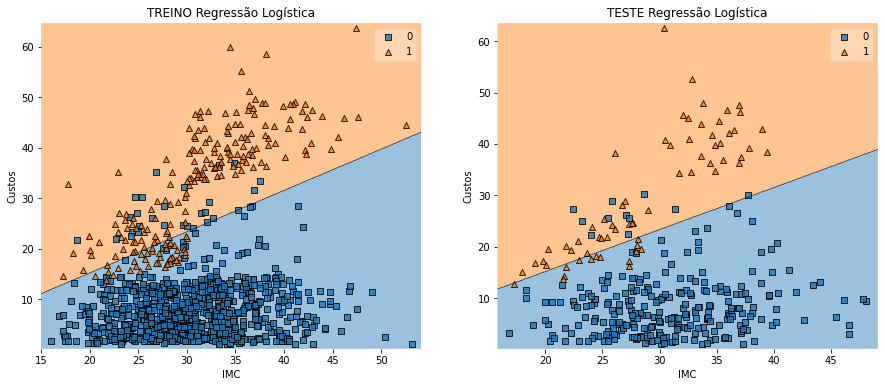

In [11]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO Regressão Logística')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE Regressão Logística')   

plt.show()

---
## **KNN**

In [12]:
from sklearn.neighbors import KNeighborsClassifier 

X = dados[['bmi', 'charges']]
y = dados['smoker'] 

k = 27
modelo = KNeighborsClassifier(n_neighbors = k) 
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9619
Sensibilidade: 0.9681
     Precisão: 0.8653


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


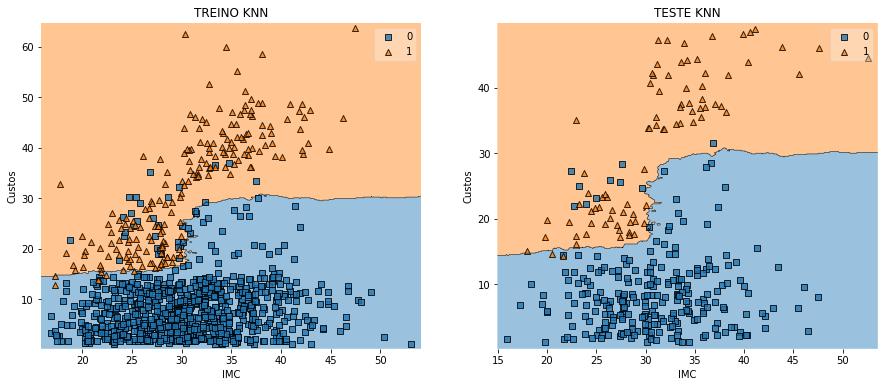

In [13]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')   

plt.show()

---
## **Árvores de Decisão**

In [14]:
from sklearn.tree import DecisionTreeClassifier

X = dados[['bmi', 'charges']]
y = dados['smoker'] 

profundidade = 3
modelo = DecisionTreeClassifier(max_depth = profundidade)
reglog = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 

print('     Acurácia:', round(reglog['test_accuracy'].mean(), 4))
print('Sensibilidade:', round(reglog['test_recall'].mean(), 4))
print('     Precisão:', round(reglog['test_precision'].mean(), 4))

     Acurácia: 0.9597
Sensibilidade: 0.9527
     Precisão: 0.8664


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


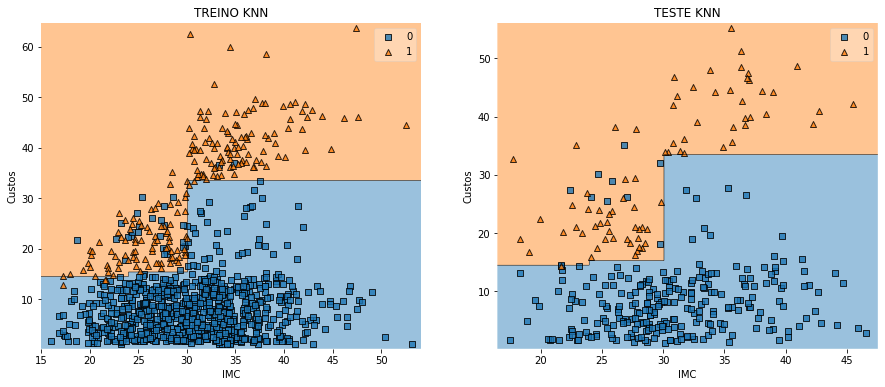

In [15]:
# Região de Decisão

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

X = dados[['bmi', 'charges']]
y = dados['smoker']

Xtreino, Xteste, ytreino, yteste  = train_test_split(X, y, test_size = 0.25)
 
modelo.fit(Xtreino, ytreino)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(Xtreino.values, ytreino.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TREINO KNN')  

plt.subplot(1, 2, 2)
plot_decision_regions(Xteste.values, yteste.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('TESTE KNN')   

plt.show()

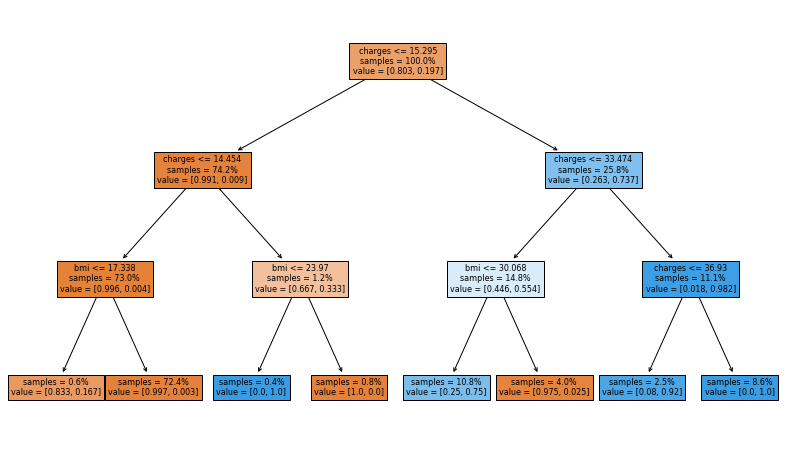

In [16]:
# Plot da Árvore

from sklearn.tree import plot_tree

plt.figure(figsize = (14, 8))
plot_tree(modelo, filled=True, proportion = True, impurity = False, feature_names = X.columns)
plt.show()

---
## **Comparação de Modelos via Validação Cruzada K-FOLD**

In [17]:
X = dados[['bmi', 'charges']]
y = dados['smoker']

modelos = [LogisticRegression(), 
           KNeighborsClassifier(n_neighbors = 5), 
           KNeighborsClassifier(n_neighbors = 15),
           KNeighborsClassifier(n_neighbors = 25),
           KNeighborsClassifier(n_neighbors = 35),
           KNeighborsClassifier(n_neighbors = 45),
           DecisionTreeClassifier(max_depth = 1),
           DecisionTreeClassifier(max_depth = 2),
           DecisionTreeClassifier(max_depth = 3),
           DecisionTreeClassifier(max_depth = 4),
           DecisionTreeClassifier(max_depth = 5)]

nomes = ['Regressão Logística',
         'KNN - K = 5', 
         'KNN - K = 15', 
         'KNN - K = 25', 
         'KNN - K = 35', 
         'KNN - K = 45',
         'Árvore - Prof = 1',
         'Árvore - Prof = 2',
         'Árvore - Prof = 3',
         'Árvore - Prof = 4',
         'Árvore - Prof = 5']

accs = []
sens = []
vpps = []

for modelo in modelos:
    resultados = cross_validate(modelo, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'precision']) 
    accs.append(resultados['test_accuracy'].mean())
    sens.append(resultados['test_recall'].mean())
    vpps.append(resultados['test_precision'].mean())

aux = {'Acurácia': accs, 'Sensibilidade': sens, 'Precisão': vpps}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = 'Precisão', ascending = False).round(4)

,Acurácia,Sensibilidade,Precisão
Árvore - Prof = 5,0.9574,0.9300,0.8785
Árvore - Prof = 3,0.9626,0.9638,0.8738
Árvore - Prof = 4,0.9627,0.9678,0.8694
KNN - K = 5,0.9589,0.9481,0.8637
KNN - K = 45,0.9596,0.9651,0.8587
Regressão Logística,0.9313,0.8059,0.8574
KNN - K = 35,0.9597,0.9654,0.8561
KNN - K = 15,0.9589,0.9585,0.8549
KNN - K = 25,0.9582,0.9619,0.8531
Árvore - Prof = 1,0.9267,0.9592,0.7508


---

## **Exercícios Propostos**

- Encontre valores ótimos para o K do KNN e a profundidade da Árvores.

- Investigue a variabilidade dos resultados via Validação Cruzada K-FOLD.

---

**_#itstimetoflai_** 